In [1]:
# Importing necessary libraries 
import numpy
from matplotlib import pyplot
from cmcrameri import cm # Necessary to use ROMA color map - You migth want to comment this line and use other color map
import sys # Necessary to read the path of python codes' folder
import utm # If necessary to convert geographic to projected coordinates

In [2]:
# Import cartopy
#import cartopy
#import cartopy.crs as ccrs

In [3]:
# Reading the path for personal modules
mypath = sys.path.append("C:/Users/nelso/Desktop/master/") # You might want to change the path for your own laptop

**Part 1: Load magnetic data and select the northern anomaly**

In [4]:
# Load data
x, y, mag = numpy.loadtxt('realdata/arraial_mag.dat', unpack = True)

In [5]:
# Define minimum and maximum values
print('Longitude minimum: %.4f' % x.min())
print('Longitude maximum: %.4f' % x.max())
print('Latitude minimum: %.4f' % y.min())
print('Latitude maximum: %.4f' % y.max())

Longitude minimum: -42.0500
Longitude maximum: -41.9400
Latitude minimum: -23.0500
Latitude maximum: -22.9200


In [6]:
# Setting colorbar ranges
cormin = mag.min()
cormax = mag.max()
corintervalo = numpy.round((cormax - cormin)/7)

In [7]:
# Setting x and y axis for plotting
xx = numpy.around(numpy.linspace(x.min(), x.max(), 6), decimals = 2)
yy = numpy.around(numpy.linspace(y.min(), y.max(), 6), decimals = 2)

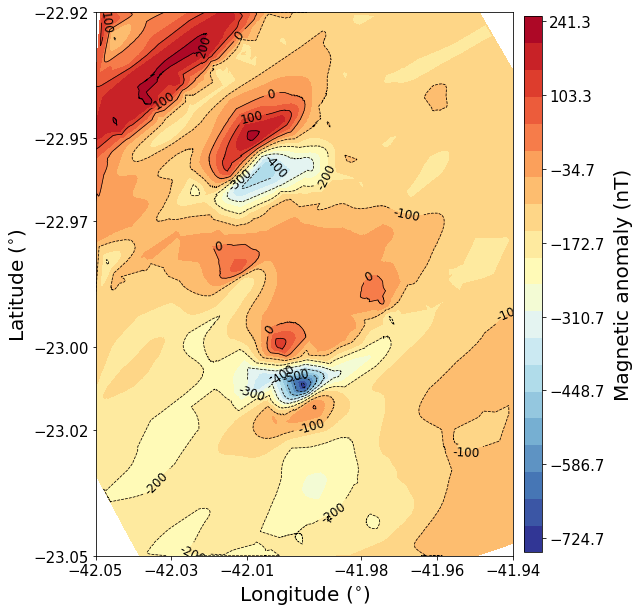

In [8]:
# Plotting data
pyplot.figure(figsize=(8,10))
cc = pyplot.tricontour(x, y, mag, 10, colors = 'k', linewidths = 0.75)
cl = pyplot.clabel(cc, inline = 1, fontsize = 12, fmt = '%1.0f')
cs = pyplot.tricontourf(x, y, mag, 20, cmap = pyplot.cm.RdYlBu_r, vmin = cormin, vmax = cormax)
cb = pyplot.colorbar(cs, shrink = 1., aspect = 30, fraction = 0.04, orientation = 'vertical', pad = 0.025)
cb.set_ticks(numpy.arange(cormin, cormax + corintervalo, corintervalo))
cb.set_label('Magnetic anomaly (nT)', fontsize = 20, labelpad = 10)
cb.ax.tick_params(labelsize = 15)
pyplot.xlabel('Longitude ($^{\circ}$)', fontsize = 20, labelpad = 5)
pyplot.ylabel('Latitude ($^{\circ}$)', fontsize = 20, labelpad = 5)
pyplot.xticks(xx, fontsize = 15)
pyplot.yticks(yy, fontsize = 15)

pyplot.show()

In [9]:
# Setting area for Morro do Forno (northern anomaly)
area = (-42.03, -41.98, -22.97, -22.93)

In [10]:
# Importing *regular grid* and *profile* from grids
from codes.grids import my_regular, my_profile

In [83]:
# Shape of new data and grid creation
shp = (51,11)
xi, yi, zi = my_regular(area, shp, -100.) # The *-200* value represent the flight level

In [84]:
# Import *griddata* function from Scipy library
from scipy.interpolate import griddata

In [85]:
# Interpolating the data and padding with zeros at the edge
di = griddata((x,y), mag, (xi,yi), method = 'linear') # If necessary, you might want to use *method='cubic' and *fill_value=0.*

In [86]:
# Setting x and y axis for plotting
xx = numpy.around(numpy.linspace(xi.min(), xi.max(), 6), decimals = 2)
yy = numpy.around(numpy.linspace(yi.min(), yi.max(), 5), decimals = 2)

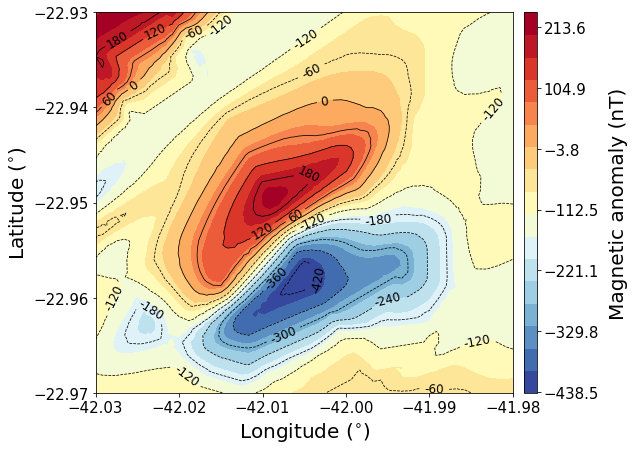

In [87]:
# Plotting data
pyplot.figure(figsize=(8,7))
cc = pyplot.tricontour(xi, yi, di, 10, colors = 'k', linewidths = 0.75)
cl = pyplot.clabel(cc, inline = 1, fontsize = 12, fmt = '%1.0f')
cs = pyplot.tricontourf(xi, yi, di, 20, cmap = pyplot.cm.RdYlBu_r, vmin = di.min(), vmax = di.max())
cb = pyplot.colorbar(cs, shrink = 1., aspect = 30, fraction = 0.04, orientation = 'vertical', pad = 0.025)
cb.set_ticks(numpy.linspace(di.min(), di.max(), 7))
cb.set_label('Magnetic anomaly (nT)', fontsize = 20, labelpad = 10)
cb.ax.tick_params(labelsize = 15)
pyplot.xlabel('Longitude ($^{\circ}$)', fontsize = 20, labelpad = 5)
pyplot.ylabel('Latitude ($^{\circ}$)', fontsize = 20, labelpad = 5)
pyplot.xticks(xx, fontsize = 15)
pyplot.yticks(yy, fontsize = 15)
pyplot.show()

In [88]:
# Setting a profile
p1 = (-42., -22.965)
p2 = (-42.015, -22.94)

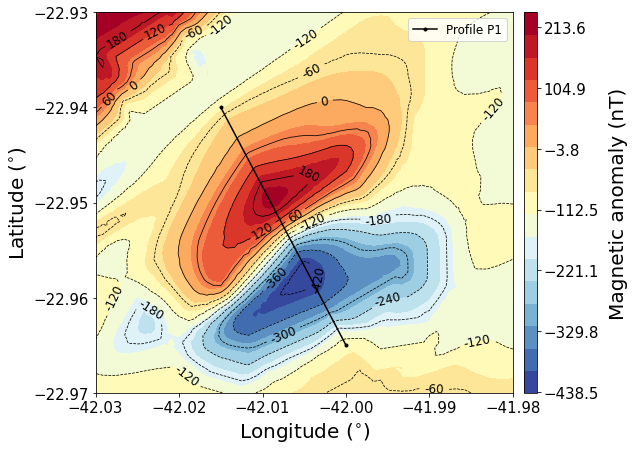

In [89]:
# Plotting the anomaly and profile
# Plotting data
pyplot.figure(figsize=(8,7))
cc = pyplot.tricontour(xi, yi, di, 10, colors = 'k', linewidths = 0.75)
cl = pyplot.clabel(cc, inline = 1, fontsize = 12, fmt = '%1.0f')
cs = pyplot.tricontourf(xi, yi, di, 20, cmap = pyplot.cm.RdYlBu_r, vmin = di.min(), vmax = di.max())
cb = pyplot.colorbar(cs, shrink = 1., aspect = 30, fraction = 0.04, orientation = 'vertical', pad = 0.025)
cb.set_ticks(numpy.linspace(di.min(), di.max(), 7))
cb.set_label('Magnetic anomaly (nT)', fontsize = 20, labelpad = 10)
cb.ax.tick_params(labelsize = 15)
pyplot.xlabel('Longitude ($^{\circ}$)', fontsize = 20, labelpad = 5)
pyplot.ylabel('Latitude ($^{\circ}$)', fontsize = 20, labelpad = 5)
pyplot.xticks(xx, fontsize = 15)
pyplot.yticks(yy, fontsize = 15)
pyplot.plot((p1[0], p2[0]), (p1[1], p2[1]), 'k.-', linewidth = 1.5, label = 'Profile P1')
pyplot.legend(loc='upper right', fontsize = 'large')
pyplot.show()

In [90]:
# Calculating the profile of magnetic anomaly
xp, yp, dp = my_profile(xi, yi, di, p1, p2, 500)

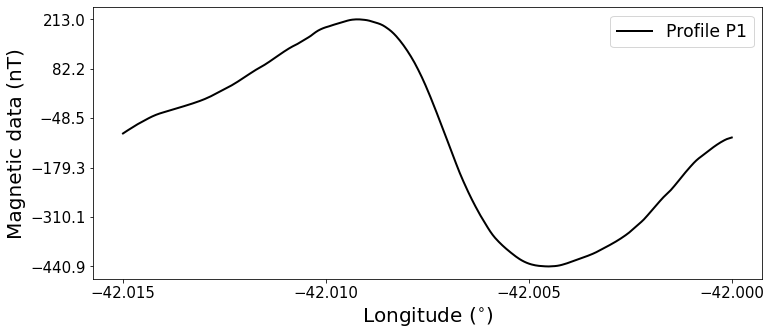

In [91]:
# Drawing profile
xxp = numpy.around(numpy.linspace(xp.min(), xp.max(), 4), decimals = 3)
ddp = numpy.around(numpy.linspace(dp.min(), dp.max(), 6), decimals = 2)
#
pyplot.figure(figsize = (12, 5))
pyplot.plot(xp, dp, 'k-', linewidth = 2., label = 'Profile P1')
pyplot.xlabel('Longitude ($^{\circ}$)', fontsize = 20)
pyplot.ylabel('Magnetic data (nT)', fontsize = 20)
pyplot.xticks(xxp, fontsize = 15)
pyplot.yticks(ddp, fontsize = 15)
pyplot.legend(loc = 'best', fontsize = 'xx-large')
pyplot.show()

In [92]:
# Save the data as xyz file
numpy.savetxt('mag_northern.xyz', numpy.vstack((xi, yi, zi)).T, fmt = '%.3f')

**Part 2: Loading and setting information about magnetic field intensity and direction from IGRF**

In [93]:
# Loading IGRF file from 2000 to 2004
inclination, declination, field = numpy.loadtxt('realdata/inc_dec_arraial.txt', unpack = True, delimiter =  ',')

In [94]:
# Setting mean values
inc = inclination.mean()
dec = declination.mean()
magf = field.mean()

In [95]:
# Import an statistical function to analyze the data
from codes.statistical import my_analysis

In [96]:
# For inclination
_ = my_analysis(inclination, 'degrees')

Minimum:    -37.050 degrees
Maximum:    -35.645 degrees
Mean value: -36.346 degrees
Variation:   1.405 degrees


In [97]:
# For declination
_ = my_analysis(declination, 'degrees')

Minimum:    -22.009 degrees
Maximum:    -21.645 degrees
Mean value: -21.826 degrees
Variation:   0.363 degrees


In [98]:
# For magnetic field intensity
_ = my_analysis(field, 'nT')

Minimum:    23434.300 nT
Maximum:    23512.300 nT
Mean value: 23472.092 nT
Variation:  78.000 nT


**Part 3: Converting to metric coordinates**

In this case, we use the **degree to km conversion**:
$$ 
\begin{matrix}
1^{\circ} & \to & 111 \, \mathbf{km} \\
\end{matrix}
$$

In [99]:
# Using here north for latitude and east for longitude
north = 111000.*yi
east = 111000.*xi

You migth want to use the **UTM** library for conversion. However it is necessary to know the letter and UTM Zone. 
* To this data in Arraial do Cabo: *xeast, ynorth = utm.from_latlon(yi, xi, 23)*

In [100]:
# Calculating Projected coordinates
xeast, ynorth, _, _ = utm.from_latlon(yi, xi)

**Part 4: Using Equivalent Layer to fit observed data**

In [101]:
# Importing modules of equivalent layer
from codes import equivalentlayer

In [216]:
# Define the setting of equivalent layer to fit magnetic data
areal = (north.min(), north.max(), east.min(), east.max()) # Same area of data
shapel = (41, 41)
depthl = 500.

**Attention!**
* In this case, you can see longitude and latitude have the same shape/size, i.e. **a numpy array** with $2601$ points and shape of $(51, 51)$. To build the equivalent layer and calculate the predicted data, we use a shape of $(41,41)$, i.e. $1681$ points. However, the **predicted data** will have the same shape of the input data.
* Another interesting detail is the use of metric coordinates. Note the longitude $ \times $ latitude points are the same of east $ \times $ north, but multiply to $111$ km instead. Which means you can use the **east/north** data to calculation and the **longitude/latitude** data to plot without any  issue.

In [217]:
# Compute the equivalent layer
mylayer = equivalentlayer.my_layer(areal, shapel, depthl)

In [218]:
# Input data for equivalent layer (x,y,z,data)
data = [north, east, zi, di]

In [219]:
# Calculate the predicted data
vec, fit = equivalentlayer.my_fitdata_mag(data, shp, mylayer, shapel, 0.001, inc, dec)

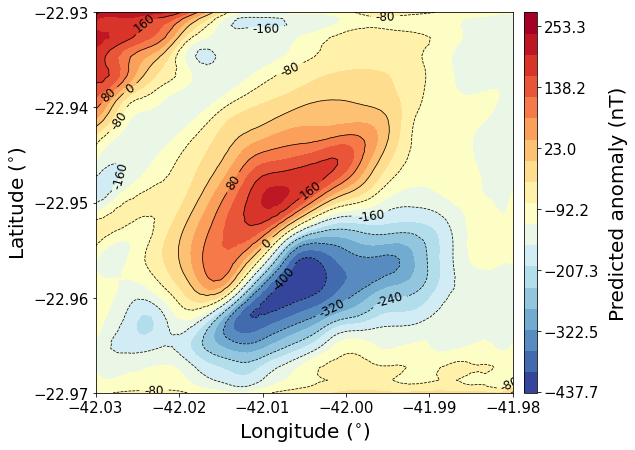

In [220]:
# Plotting fitted data
pyplot.figure(figsize=(8,7))
cc = pyplot.tricontour(xi, yi, fit, 10, colors = 'k', linewidths = 0.75)
cl = pyplot.clabel(cc, inline = 1, fontsize = 12, fmt = '%1.0f')
cs = pyplot.tricontourf(xi, yi, fit, 20, cmap = pyplot.cm.RdYlBu_r, vmin = fit.min(), vmax = fit.max())
cb = pyplot.colorbar(cs, shrink = 1., aspect = 30, fraction = 0.04, orientation = 'vertical', pad = 0.025)
cb.set_ticks(numpy.linspace(fit.min(), fit.max(), 7))
cb.set_label('Predicted anomaly (nT)', fontsize = 20, labelpad = 10)
cb.ax.tick_params(labelsize = 15)
pyplot.xlabel('Longitude ($^{\circ}$)', fontsize = 20, labelpad = 5)
pyplot.ylabel('Latitude ($^{\circ}$)', fontsize = 20, labelpad = 5)
pyplot.xticks(xx, fontsize = 15)
pyplot.yticks(yy, fontsize = 15)
pyplot.show()

**Part 5: Computing the cross-correlation coefficients**

In [221]:
# Importing potential field filters function from *filtering* and *derivative* libraries
from codes import filtering, derivative

In [222]:
# Importing *rtp* function from equivalent layer library
from codes.equivalentlayer import my_rtp_layer

In [223]:
# Import the time computation
from time import time

In [224]:
# Import the correlation function from statistical module
from codes.statistical import my_correlation_coef

**Attention!**
* Here we will compute the correlation between two potential field data. The first one is the **total gradient of reduction to the pole** data; the second is the **vertical gradient of reduction to the pole** data. In order to simplify, we will use $d_0$ as **RTP data**, $d_1$ as **TGA data** and $d_2$ as **VG data**. * It is very important to remember that $d_1$ and $d_2$ are computaded repeatedly for each pair of **inclination** $(I)$ and **declination** (D) as well as $d_0$, during the loop processing. Then the formulation for correlation coefficient $(C)$ is:

$$
C(I,D) = \dfrac{
\sum \limits_{i =1}^{n} (d_1 - \hat{d_1}) \cdot (d_2 - \hat{d_2})
}{
\sqrt{
\sum \limits_{i =1}^{n} (d_1 - \hat{d_1})^2
} \cdot 
\sqrt{
\sum \limits_{i =1}^{n} (d_2 - \hat{d_2})^2
}
} 
$$

* $\hat{d_1}$ and $\hat{d_2}$ are the mean values of each potential field data.

In [225]:
# Create a range of inclination and declination
#gridarea = (-90., 90., -90., 90.)
#gridsize = (19, 19)
#D, I = my_regular(gridarea, gridsize)

In [226]:
# Create a zero matrix to allocate the results
#C = numpy.zeros_like(I)

In [227]:
# Reshaping the data to use a matrix notation in the loop
#D = D.reshape(gridsize)
#I = I.reshape(gridsize)
#C = C.reshape(gridsize)

In [228]:
# Create a range of inclination and declination
grid_inc = numpy.linspace(-90., 90., 10)
grid_dec = numpy.linspace(-90., 90., 10)
D, I = numpy.meshgrid(grid_dec, grid_inc)

In [229]:
# Create a zero matrix to allocate the results
C = numpy.zeros_like(I)

In [230]:
# Compute the cross-correlation and time of processing
timei = time()
#
for cols, d in enumerate(grid_dec):
    for rows, i in enumerate(grid_inc):
        if i >= -20. or i <= 20.:
            rtp = equivalentlayer.my_rtp_layer(data, shp, mylayer, shapel, 0.001, inc, dec, i, d)
            C[rows, cols] = my_correlation_coef(
                derivative.my_totalgrad(north.reshape(shp), east.reshape(shp), rtp.reshape(shp)),
                derivative.my_zderiv(north.reshape(shp), east.reshape(shp), rtp.reshape(shp)))
        else:
            rtpdata = filtering.reduction(north.reshape(shp), east.reshape(shp), di.reshape(shp), inc, dec, i, d)
            C[rows, cols] = my_correlation_coef(
                derivative.my_totalgrad(north.reshape(shp), east.reshape(shp), rtp.reshape(shp)),
                derivative.my_zderiv(north.reshape(shp), east.reshape(shp), rtp.reshape(shp)))
#
timef = time()

In [231]:
print ('Calculation process (in seconds): %.3f' % (timef-timei))

Calculation process (in seconds): 634.917


In [232]:
# Analysis of correlation coefficients
_ = my_analysis(C)

Minimum:    -0.213 (No Unit)
Maximum:     0.198 (No Unit)
Mean value: -0.014 (No Unit)
Variation:   0.411 (No Unit)


In [233]:
# Interpolate the result to better visualization
shpi = (181, 181)
Di, Ii = my_regular((-90., 90., -90., 90.), shpi)

In [234]:
Ci = griddata((D.reshape(D.size), I.reshape(I.size)), C.reshape(C.size), (Di, Ii), method = 'cubic')

In [235]:
# Save the correlation data
numpy.savetxt('correlation.xyz', numpy.vstack((Di, Ii, Ci)).T, fmt = '%.3f')

In [236]:
# Search for the interpolated result
p1, p2 = numpy.where(Ci.reshape(shpi) == Ci.max())
pimax = float(Ii.reshape(shpi)[p1, p2])
pdmax = float(Di.reshape(shpi)[p1, p2])
print ('(I,D) for maximum coefficient')
print ('Inclination: %.2f' % pimax)
print ('Declination: %.2f'% pdmax)

(I,D) for maximum coefficient
Inclination: -10.00
Declination: 32.00


In [237]:
# Setting x and y axis for plotting
xdec = numpy.around(numpy.linspace(Di.min(), Di.max(), 7), decimals = 2)
yinc = numpy.around(numpy.linspace(Ii.min(), Ii.max(), 7), decimals = 2)

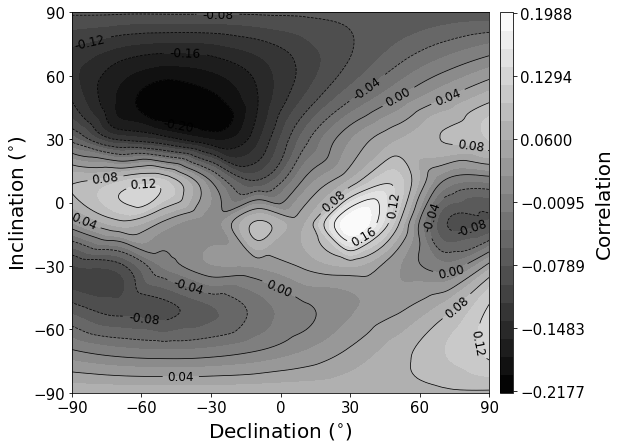

In [238]:
# Plotting fitted data
pyplot.figure(figsize=(8,7))
cc = pyplot.tricontour(Di, Ii, Ci, 10, colors = 'k', linewidths = 0.75)
cl = pyplot.clabel(cc, inline = 1, fontsize = 12, fmt = '%1.2f')
cs = pyplot.tricontourf(Di, Ii, Ci, 20, cmap = pyplot.cm.gray, vmin = Ci.min(), vmax = Ci.max())
cb = pyplot.colorbar(cs, shrink = 1., aspect = 30, fraction = 0.04, orientation = 'vertical', pad = 0.025)
cb.set_ticks(numpy.linspace(Ci.min(), Ci.max(), 7))
cb.set_label('Correlation', fontsize = 20, labelpad = 10)
cb.ax.tick_params(labelsize = 15)
pyplot.xlabel('Declination ($^{\circ}$)', fontsize = 20, labelpad = 5)
pyplot.ylabel('Inclination ($^{\circ}$)', fontsize = 20, labelpad = 5)
pyplot.xticks(xdec, fontsize = 15)
pyplot.yticks(yinc, fontsize = 15)
pyplot.show()